**Import libraries**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from scipy import stats
from sklearn.model_selection import train_test_split, GridSearchCV, StratifiedShuffleSplit
from sklearn.feature_selection import RFE
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.model_selection import KFold
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA, IncrementalPCA#, plot_roc_curve
from sklearn.inspection import permutation_importance
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
from sklearn import svm
import xgboost as xgb
from sklearn.metrics import accuracy_score, log_loss, f1_score, classification_report, roc_curve, plot_roc_curve
from sklearn.metrics import confusion_matrix, precision_score, recall_score, precision_recall_curve, roc_auc_score
import warnings
warnings.filterwarnings('ignore')


/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


Read datasets

In [2]:
train = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")

In [3]:
#Setting max columns/rows display range
pd.set_option('display.max_columns', 200)
pd.set_option('display.max_rows', 500)

In [4]:
#Checking the shape of initial dataset
train.shape

(69999, 172)

In [5]:
#Prints information about a Train DataFrame including the index dtype and columns, non-null values and memory usage.
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 69999 entries, 0 to 69998
Columns: 172 entries, id to churn_probability
dtypes: float64(135), int64(28), object(9)
memory usage: 91.9+ MB


In [6]:
#Generate descriptive statistics of Train dataset
train.describe().T

,count,mean,std,min,25%,50%,75%,max
id,69999.0,34999.000000,20207.115084,0.000,17499.5000,34999.000,52498.5000,69998.000
circle_id,69999.0,109.000000,0.000000,109.000,109.0000,109.000,109.0000,109.000
loc_og_t2o_mou,69297.0,0.000000,0.000000,0.000,0.0000,0.000,0.0000,0.000
std_og_t2o_mou,69297.0,0.000000,0.000000,0.000,0.0000,0.000,0.0000,0.000
loc_ic_t2o_mou,69297.0,0.000000,0.000000,0.000,0.0000,0.000,0.0000,0.000
arpu_6,69999.0,283.134365,334.213918,-2258.709,93.5810,197.484,370.7910,27731.088
arpu_7,69999.0,278.185912,344.366927,-1289.715,86.7140,191.588,365.3695,35145.834
arpu_8,69999.0,278.858826,351.924315,-945.808,84.0950,192.234,369.9090,33543.624
onnet_mou_6,67231.0,133.153275,299.963093,0.000,7.4100,34.110,119.3900,7376.710
onnet_mou_7,67312.0,133.894438,311.277193,0.000,6.6750,32.280,115.8375,8157.780


In [7]:
# Checking detaile information about train data.
def getDatasetDetail(data) : 
    return pd.DataFrame({
                'Datatype' : data.dtypes.astype(str), 
                'Non_Null_Count': data.count(axis = 0).astype(int), 
                'Null_Count': data.isnull().sum().astype(int), 
                'Null_Percentage': round(data.isnull().sum()/len(data) * 100 , 2), 
                'Unique_Values_Count': data.nunique().astype(int) 
                 }).sort_values(by='Null_Percentage', ascending=False)

In [8]:
#Check for null values
getDatasetDetail(train)

,Datatype,Non_Null_Count,Null_Count,Null_Percentage,Unique_Values_Count
arpu_3g_6,float64,17568,52431,74.90,5506
count_rech_2g_6,float64,17568,52431,74.90,30
night_pck_user_6,float64,17568,52431,74.90,2
arpu_2g_6,float64,17568,52431,74.90,5389
date_of_last_rech_data_6,object,17568,52431,74.90,30
total_rech_data_6,float64,17568,52431,74.90,36
av_rech_amt_data_6,float64,17568,52431,74.90,792
max_rech_data_6,float64,17568,52431,74.90,47
count_rech_3g_6,float64,17568,52431,74.90,23
fb_user_6,float64,17568,52431,74.90,2


In [9]:
#Droping all column which contain more than 50% null value
train = train.loc[: ,((train.isnull().sum()/len(train))*100)< 50 ]
train

,id,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,date_of_last_rech_6,date_of_last_rech_7,date_of_last_rech_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,churn_probability
0,0,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,31.277,87.009,7.527,48.58,124.38,1.29,32.24,96.68,2.33,0.00,0.0,0.0,0.00,0.0,0.00,2.23,0.00,0.28,5.29,16.04,2.33,0.00,0.00,0.00,0.00,0.00,0.00,7.53,16.04,2.61,46.34,124.38,1.01,18.75,80.61,0.00,0.00,0.0,0.0,0.0,0.0,0.0,65.09,204.99,1.01,0.00,0.0,0.0,8.20,0.63,0.00,0.38,0.0,0.0,81.21,221.68,3.63,2.43,3.68,7.79,0.83,21.08,16.91,0.00,0.00,0.00,3.26,24.76,24.71,0.00,7.61,0.21,7.46,19.96,14.96,0.0,0.0,0.00,0.0,0.0,0.0,7.46,27.58,15.18,11.84,53.04,40.56,0.0,0.0,0.66,0.00,0.0,0.00,1.11,0.69,0.00,3,2,2,77,65,10,65,65,10,6/22/2014,7/10/2014,8/24/2014,65,65,0,0.00,0.00,0.00,0.00,0.00,0.00,0,0,0,0,0,0,0,0,0,0,0,0,1958,0.00,0.00,0.00,0
1,1,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,0.000,122.787,42.953,0.00,0.00,0.00,0.00,25.99,30.89,0.00,0.0,0.0,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,22.01,29.79,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.00,0.00,0.0,0.0,0.00,30.73,31.66,0.00,0.0,0.0,0.00,30.73,31.66,1.68,19.09,10.53,1.41,18.68,11.09,0.35,1.66,3.40,3.44,39.44,25.03,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.0,0.00,0.0,0.0,0.0,0.00,0.00,0.00,3.44,39.44,25.04,0.0,0.0,0.01,0.00,0.0,0.00,0.00,0.00,0.00,3,4,5,0,145,50,0,145,50,6/12/2014,7/10/2014,8/26/2014,0,0,0,0.00,352.91,0.00,0.00,3.96,0.00,0,0,0,0,0,0,0,1,0,0,0,0,710,0.00,0.00,0.00,0
2,2,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,60.806,103.176,0.000,0.53,15.93,0.00,53.99,82.05,0.00,0.00,0.0,0.0,0.00,0.0,0.00,0.53,12.98,0.00,24.11,0.00,0.00,0.00,0.00,0.00,2.14,0.00,0.00,24.64,12.98,0.00,0.00,2.94,0.00,28.94,82.05,0.00,0.00,0.0,0.0,0.0,0.0,0.0,28.94,84.99,0.00,0.00,0.0,0.0,2.89,1.38,0.00,0.00,0.0,0.0,56.49,99.36,0.00,4.51,6.16,6.49,89.86,25.18,23.51,0.00,0.00,0.00,94.38,31.34,30.01,11.69,0.00,0.00,18.21,2.48,6.38,0.0,0.0,0.00,0.0,0.0,0.0,29.91,2.48,6.38,124.29,33.83,36.64,0.0,0.0,0.00,0.00,0.0,0.00,0.00,0.00,0.25,2,4,2,70,120,0,70,70,0,6/

In [10]:
#Shape of train dataset after removal of null value columns
train.shape

(69999, 142)

In [11]:
#Recheck the null value percentage
getDatasetDetail(train)

,Datatype,Non_Null_Count,Null_Count,Null_Percentage,Unique_Values_Count
roam_og_mou_8,float64,66296,3703,5.29,5215
og_others_8,float64,66296,3703,5.29,179
spl_og_mou_8,float64,66296,3703,5.29,3848
loc_ic_t2t_mou_8,float64,66296,3703,5.29,11446
loc_og_t2m_mou_8,float64,66296,3703,5.29,17616
loc_og_t2c_mou_8,float64,66296,3703,5.29,2204
loc_ic_t2m_mou_8,float64,66296,3703,5.29,19022
loc_og_t2t_mou_8,float64,66296,3703,5.29,11296
loc_ic_t2f_mou_8,float64,66296,3703,5.29,6092
std_og_t2f_mou_8,float64,66296,3703,5.29,1945


**Impute missing values**

In [12]:
#Function to handle missing values
def fill_Missing_Values(df):    
    # check missing values
    miss_col = df.isnull().sum()
    # filter for null value columns
    miss_col = miss_col[miss_col > 0]
    #Loop missing columns
    for column in miss_col.index:
        if df[column].dtype.name == 'object':
            # impute object type columns with mode
            df[column].fillna(df[column].mode()[0], inplace=True)
            
        elif df[column].dtype.name == 'float64' or df[column].dtype.name == 'int64' or df[column].dtype.name == 'int32':
            # impute numeric type columns with median
            df[column] = df[column].fillna((df[column].median()))
            
        else:
            print('Unable to handle: ', column)
            
    return df

In [13]:
#Fill missing values
train = fill_Missing_Values(train)

In [14]:
#Check if any missing values exists
getDatasetDetail(train)

,Datatype,Non_Null_Count,Null_Count,Null_Percentage,Unique_Values_Count
id,int64,69999,0,0.0,69999
spl_ic_mou_8,float64,69999,0,0.0,95
std_ic_mou_8,float64,69999,0,0.0,9939
total_ic_mou_6,float64,69999,0,0.0,27432
total_ic_mou_7,float64,69999,0,0.0,27418
total_ic_mou_8,float64,69999,0,0.0,27318
spl_ic_mou_6,float64,69999,0,0.0,78
spl_ic_mou_7,float64,69999,0,0.0,103
isd_ic_mou_6,float64,69999,0,0.0,4421
std_ic_mou_6,float64,69999,0,0.0,9876


In [15]:
train.describe()

,id,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,churn_probability
count,69999.000000,69999.0,69999.0,69999.0,69999.0,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.00000,69999.000000,69999.000000,69999.000000,69999.0,69999.0,69999.0,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.0,69999.0,69999.0,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.00000,69999.000000
mean,34999.000000,109.0,0.0,0.0,0.0,283.134365,278.185912,278.858826,129.236765,129.993840,127.641721,194.825731,193.112523,191.002562,9.379276,6.745305,6.634328,13.625476,9.464386,9.254848,45.521038,44.838857,43.890335,91.173739,88.855772,88.435599,3.595161,3.632045,3.467948,1.081499,1.308807,1.345676,140.781376,137.

**Check for unique value columns**

In [16]:
#Check if any unique value columns in dataset
for a in train.columns:
    if len(train[a].unique()) == train.shape[0]:
        print(a)

id


In [17]:
for a in train.columns:
    if len(train[a].unique()) == 1:
        print(a)

circle_id
loc_og_t2o_mou
std_og_t2o_mou
loc_ic_t2o_mou
last_date_of_month_6
last_date_of_month_7
last_date_of_month_8
std_og_t2c_mou_6
std_og_t2c_mou_7
std_og_t2c_mou_8
std_ic_t2o_mou_6
std_ic_t2o_mou_7
std_ic_t2o_mou_8


In [18]:
#Dropping columns which does not help in predicting 
columnsToDrop=['id',
                'circle_id',
                'loc_og_t2o_mou',
                'std_og_t2o_mou',
                'loc_ic_t2o_mou',
                'last_date_of_month_6',
                'last_date_of_month_7',
                'last_date_of_month_8',
                'std_og_t2c_mou_6',
                'std_og_t2c_mou_7',
                'std_og_t2c_mou_8',
                'std_ic_t2o_mou_6',
                'std_ic_t2o_mou_7',
                'std_ic_t2o_mou_8']
train.drop(columnsToDrop,inplace=True,axis=1)

**Derive new features**

In [19]:
train["date_of_last_rech_8"] = pd.to_datetime(train['date_of_last_rech_8'])
train["date_of_last_rech_7"] = pd.to_datetime(train['date_of_last_rech_7'])
train["date_of_last_rech_6"] = pd.to_datetime(train['date_of_last_rech_6'])

In [20]:
train['recharge2_days']=(train['date_of_last_rech_8'] - train['date_of_last_rech_7']).dt.days
train['recharge1_days']=(train['date_of_last_rech_7'] - train['date_of_last_rech_6']).dt.days

In [21]:
#Dropping few date columns which are not useful for analysis
train.drop(['date_of_last_rech_6','date_of_last_rech_7','date_of_last_rech_8'], inplace=True, axis=1)

**Check for Highly correlated variables**

In [22]:
def deleteHighCorrData(dataset, limit):
    col_corr = set() # Set of all the names of deleted columns
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if (corr_matrix.iloc[i, j] >= limit) and (corr_matrix.columns[j] not in col_corr):
                colname = corr_matrix.columns[i] # getting the name of column
                col_corr.add(colname)
                if colname in dataset.columns:
                    del dataset[colname] # deleting the column from the dataset

In [23]:
#delete highly correlated data
deleteHighCorrData(train,0.85)

In [24]:
#Recheck the shape of dataframe
train.shape

(69999, 109)

In [25]:
#Checking churn_probability column data
train['churn_probability'].value_counts()

0    62867
1     7132
Name: churn_probability, dtype: int64

In [26]:
#Percentage of churn probability
100. * train.churn_probability.value_counts() / len(train.churn_probability)

0    89.811283
1    10.188717
Name: churn_probability, dtype: float64

**Handle Outliers**

In [27]:
def cap_outliers(array, k=3):
    upper_limit = array.mean() + k*array.std()
    lower_limit = array.mean() - k*array.std()
    array[array<lower_limit] = lower_limit
    array[array>upper_limit] = upper_limit
    return array

In [28]:
# #Get all numeric columns
numCol = train.select_dtypes(exclude=['object']).columns

In [29]:
#Cap all Outliers
for col in numCol: 
  arr = cap_outliers(train[col])
  train[col] = arr

**Data Visualization**

In [30]:
train['churn_probability'].dtype

dtype('int64')

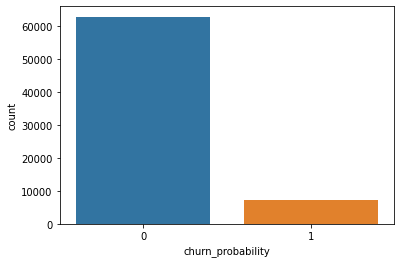

In [31]:
# Plot countplot for churn  probabilities
sns.countplot(x="churn_probability",data = train)

**Observations:**
Churn rate is very low in the data. For model buliding need to handle this imbalanced data.

In [32]:
list(train.columns)

['arpu_6',
 'arpu_7',
 'arpu_8',
 'onnet_mou_6',
 'onnet_mou_7',
 'onnet_mou_8',
 'offnet_mou_6',
 'offnet_mou_7',
 'offnet_mou_8',
 'roam_ic_mou_6',
 'roam_ic_mou_7',
 'roam_ic_mou_8',
 'roam_og_mou_6',
 'roam_og_mou_7',
 'roam_og_mou_8',
 'loc_og_t2t_mou_6',
 'loc_og_t2t_mou_7',
 'loc_og_t2t_mou_8',
 'loc_og_t2m_mou_6',
 'loc_og_t2m_mou_7',
 'loc_og_t2m_mou_8',
 'loc_og_t2f_mou_6',
 'loc_og_t2f_mou_7',
 'loc_og_t2f_mou_8',
 'loc_og_t2c_mou_6',
 'loc_og_t2c_mou_7',
 'loc_og_t2c_mou_8',
 'loc_og_mou_6',
 'loc_og_mou_7',
 'loc_og_mou_8',
 'std_og_t2m_mou_6',
 'std_og_t2f_mou_6',
 'std_og_t2f_mou_7',
 'std_og_t2f_mou_8',
 'std_og_mou_6',
 'std_og_mou_7',
 'std_og_mou_8',
 'isd_og_mou_6',
 'spl_og_mou_6',
 'spl_og_mou_7',
 'spl_og_mou_8',
 'og_others_6',
 'og_others_7',
 'og_others_8',
 'total_og_mou_6',
 'loc_ic_t2t_mou_6',
 'loc_ic_t2t_mou_7',
 'loc_ic_t2t_mou_8',
 'loc_ic_t2m_mou_6',
 'loc_ic_t2m_mou_7',
 'loc_ic_t2m_mou_8',
 'loc_ic_t2f_mou_6',
 'loc_ic_t2f_mou_7',
 'loc_ic_t2f_mou_8'

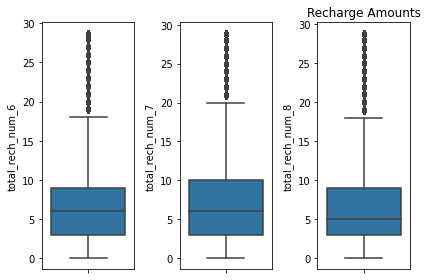

In [33]:
# Box plot for recharge Numbers for 6,7,8 months
fig, axes = plt.subplots(1,3)

cols=['total_rech_num_6','total_rech_num_7','total_rech_num_8']
for name, ax in zip(cols, axes.flatten()):
    sns.boxplot(y=name , data=train, ax=ax)
plt.title('Recharge Amounts')    
plt.tight_layout()

Text(0.5, 0.98, 'Incoming Calls Usage')

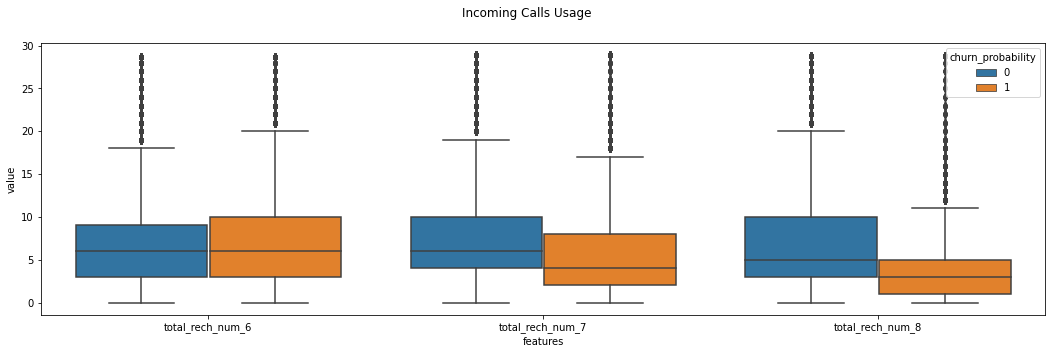

In [35]:
# Plot boxplot for incoming calls vs churn 
df_ic=train[["total_rech_num_6","total_rech_num_7","total_rech_num_8","churn_probability"]]
plt.figure(figsize=(18, 5))
X = pd.melt(df_ic,id_vars="churn_probability",var_name="features",value_name='value')
sns.boxplot(x="features", y="value", hue="churn_probability",data = X)  
plt.suptitle('Incoming Calls Usage')

Text(0.5, 0.98, 'Incoming Calls Usage')

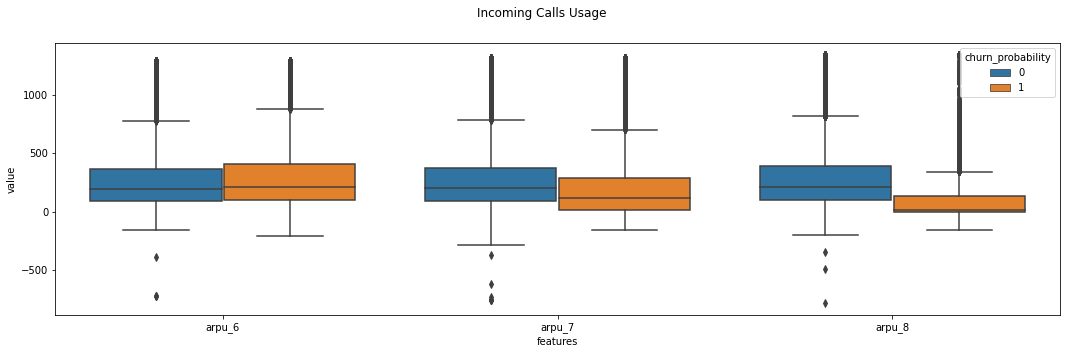

In [36]:
# Plot boxplot for incoming calls vs churn 
df_ic=train[["arpu_6","arpu_7","arpu_8","churn_probability"]]
plt.figure(figsize=(18, 5))
X = pd.melt(df_ic,id_vars="churn_probability",var_name="features",value_name='value')
sns.boxplot(x="features", y="value", hue="churn_probability",data = X)  
plt.suptitle('Incoming Calls Usage')

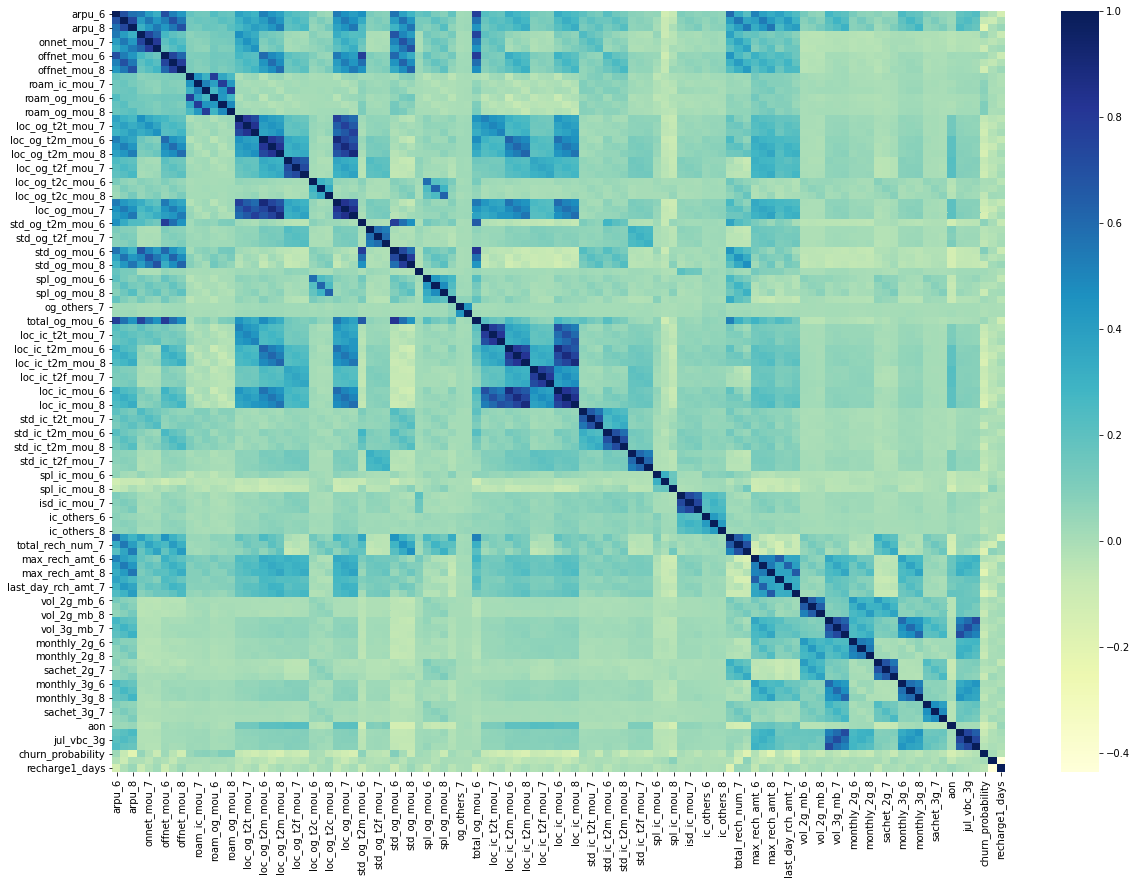

In [45]:
# Heatmap
plt.figure(figsize = (20,14))
sns.heatmap(train.corr(),cmap="YlGnBu", annot=False)
plt.show()

**Feature Selection**

In [37]:
#Split dependent and independent features for modeling
X = train.drop("churn_probability",1)
y = train.churn_probability

In [38]:
#Checking the shape of X and y
X.shape, y.shape

((69999, 108), (69999,))

In [39]:
#Split into train and test datasets
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state=42)

In [40]:
#Check the shape of X_train and X_test
X_train.shape, X_test.shape

((52499, 108), (17500, 108))

**Using SMOTE to handle imbalanced data**

In [41]:
# Instantiate SMOTE
from imblearn.over_sampling import SMOTE
sm = SMOTE(random_state=42)

In [42]:
# Fit SMOTE to the train set
X_train, y_train = sm.fit_resample(X_train, y_train)

In [43]:
# Instantiate the Scaler
scaler = StandardScaler()
# Fit the data into scaler and transform
X_train[X_train.columns] = scaler.fit_transform(X_train[X_train.columns])

In [44]:
# Transform val/Testset
X_test[X_train.columns] = scaler.transform(X_test[X_train.columns])

**Use Randomforest for feature selection**

In [45]:
from sklearn.feature_selection import SelectFromModel

In [46]:
# Use Randomforest for feature selection
sel = SelectFromModel(RandomForestClassifier(n_estimators = 100))
sel.fit(X_train, y_train)

SelectFromModel(estimator=RandomForestClassifier())

In [47]:
sel.get_support()

array([False, False,  True, False, False,  True, False, False,  True,
       False,  True,  True, False,  True,  True, False, False,  True,
       False, False,  True, False, False,  True, False, False, False,
       False, False,  True,  True, False, False, False, False, False,
        True, False, False, False, False, False, False, False, False,
       False, False,  True, False,  True,  True, False, False,  True,
       False, False,  True, False, False, False, False, False,  True,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False,  True, False, False,  True,
       False, False,  True, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False,  True, False, False, False,  True, False])

In [48]:
# Check number of important features selected by randomforest
selected_feat= X_train.columns[(sel.get_support())]
len(selected_feat)

24

In [49]:
print(selected_feat)

Index(['arpu_8', 'onnet_mou_8', 'offnet_mou_8', 'roam_ic_mou_7',
       'roam_ic_mou_8', 'roam_og_mou_7', 'roam_og_mou_8', 'loc_og_t2t_mou_8',
       'loc_og_t2m_mou_8', 'loc_og_t2f_mou_8', 'loc_og_mou_8',
       'std_og_t2m_mou_6', 'std_og_mou_8', 'loc_ic_t2t_mou_8',
       'loc_ic_t2m_mou_7', 'loc_ic_t2m_mou_8', 'loc_ic_t2f_mou_8',
       'loc_ic_mou_8', 'std_ic_t2m_mou_8', 'total_rech_num_8',
       'max_rech_amt_8', 'last_day_rch_amt_8', 'aon', 'recharge2_days'],
      dtype='object')


In [50]:
sel.get_support(indices=True)

array([  2,   5,   8,  10,  11,  13,  14,  17,  20,  23,  29,  30,  36,
        47,  49,  50,  53,  56,  62,  77,  80,  83, 102, 106])

In [51]:
# Following function will be used for different models evaluation
def evaluate_model(actual, pred):
    # Accuracy Score
    acc_sc = round(accuracy_score(actual, pred)*100,2)
    
    # Precision score
    prec_sc = round(precision_score(actual, pred)*100,2)
    
    # Recall score
    rec_sc = round(recall_score(actual, pred)*100,2)
    
    # Confusion matrix
    confusion_m = confusion_matrix(actual, pred)
   
    TP = confusion_m[1,1] # true positive 
    TN = confusion_m[0,0] # true negatives
    FP = confusion_m[0,1] # false positives
    FN = confusion_m[1,0] # false negatives
    # Specificity
    Specificity= round(TN / float(TN+FP),2)
    # ROC AUC score
    roc_score = round(recall_score(actual, pred)*100,2)
    #F1-Score
    f1_score=round(2*((prec_sc*rec_sc)/(prec_sc+rec_sc)),2)
    return {"TP":TP,"TN":TN,"FP":FP,"FN":FN,"Recall":rec_sc,"Precision":prec_sc,"Specificity":Specificity,"ROC/AUC Score":roc_score,"F1-Score":f1_score, "Accuracy":acc_sc}

**Logistic Regression using important features**

In [52]:
#Create a dataset based on features selected by Random forest feature selector
X_train_new= X_train[selected_feat]

In [53]:
# Build Logistic Regression using important features
# Initialize the Logistic regression
model_lg = LogisticRegression(random_state=42)
# fit the training data
model_lg.fit(X_train_new, y_train)
# predict the training data
Y_train_pred = model_lg.predict(X_train_new)
# predict the testing data
Y_test_pred = model_lg.predict(X_test[selected_feat])

In [54]:
# Model evaluation
train_eval=pd.DataFrame([evaluate_model(y_train, Y_train_pred)])
test_eval=pd.DataFrame([evaluate_model(y_test, Y_test_pred)])
df_eval=pd.concat([train_eval,test_eval])
df_eval['data']=['train_data','test_data']
df_eval.set_index('data',inplace=True)

In [55]:
df_eval

,TP,TN,FP,FN,Recall,Precision,Specificity,ROC/AUC Score,F1-Score,Accuracy
data,,,,,,,,,,
train_data,40523,36865,10285,6627,85.94,79.76,0.78,85.94,82.73,82.07
test_data,1481,12385,3332,302,83.06,30.77,0.79,83.06,44.90,79.23


**Random Forest using imported feature**

In [56]:
randfor = RandomForestClassifier(random_state=42, n_jobs=12)

In [57]:
params = {
    'max_depth': [40,50,60],
    'min_samples_split':[5],
    'min_samples_leaf': [3],
    'n_estimators': [95,100,110]
}
grid_search = GridSearchCV(estimator=randfor,
                           param_grid=params,
                           cv = 4,
                           n_jobs=-1, verbose=1, scoring="accuracy")

grid_search.fit(X_train_new,y_train)

Fitting 4 folds for each of 9 candidates, totalling 36 fits


GridSearchCV(cv=4, estimator=RandomForestClassifier(n_jobs=12, random_state=42),
             n_jobs=-1,
             param_grid={'max_depth': [40, 50, 60], 'min_samples_leaf': [3],
                         'min_samples_split': [5],
                         'n_estimators': [95, 100, 110]},
             scoring='accuracy', verbose=1)

In [58]:
#Print the best score
grid_search.best_score_

0.9404772004241782

In [59]:
#Get all best estimators
alpha = grid_search.best_estimator_
alpha

RandomForestClassifier(max_depth=40, min_samples_leaf=3, min_samples_split=5,
                       n_estimators=110, n_jobs=12, random_state=42)

In [60]:
#Rerun the model using best estimators
randfor = RandomForestClassifier(max_depth=40, min_samples_leaf=3, min_samples_split=5,
                       n_estimators=110, n_jobs=12, random_state=42,oob_score = True)
randfor.fit(X_train_new,y_train)

RandomForestClassifier(max_depth=40, min_samples_leaf=3, min_samples_split=5,
                       n_estimators=110, n_jobs=12, oob_score=True,
                       random_state=42)

In [61]:
#Print OOB score
randfor.oob_score_

0.9462248144220573

In [62]:
# predict the training data
Y_train_pred = randfor.predict(X_train_new)
# predict the testing data
Y_test_pred = randfor.predict(X_test[selected_feat])

In [63]:
# Model evaluation
train_eval=pd.DataFrame([evaluate_model(y_train, Y_train_pred)])
test_eval=pd.DataFrame([evaluate_model(y_test, Y_test_pred)])
df_eval=pd.concat([train_eval,test_eval])
df_eval['data']=['train_data','test_data']
df_eval.set_index('data',inplace=True)

In [64]:
df_eval

,TP,TN,FP,FN,Recall,Precision,Specificity,ROC/AUC Score,F1-Score,Accuracy
data,,,,,,,,,,
train_data,46646,46159,991,504,98.93,97.92,0.98,98.93,98.42,98.41
test_data,1266,14911,806,517,71.00,61.10,0.95,71.00,65.68,92.44


####**PCA**

In [65]:
# initialize the pca with randomized
pca = PCA(random_state=42)
# fit the training dataset
pca.fit(X_train)

PCA(random_state=42)

In [66]:
# Principal components
pca.components_

array([[ 1.49787403e-01,  1.77414175e-01,  1.74652953e-01, ...,
         6.42764707e-02, -2.27024008e-02, -6.95260838e-03],
       [ 1.62469290e-01,  1.47599101e-01,  8.16039254e-02, ...,
        -9.32514894e-02, -1.18579184e-02, -3.40227018e-02],
       [ 6.16610971e-02,  1.05484671e-01,  1.08203110e-01, ...,
         2.30373335e-01, -2.17682747e-03,  5.60057451e-03],
       ...,
       [ 3.83517873e-03, -6.64206729e-03,  5.05628406e-03, ...,
         8.09399387e-04,  8.54891990e-04,  1.84831737e-03],
       [-1.85634661e-03, -8.05752839e-03,  7.81212529e-03, ...,
        -1.55377905e-03,  5.15231848e-04,  2.01245615e-03],
       [ 4.32483363e-03,  1.48253843e-03, -1.02651215e-03, ...,
         4.36575512e-05,  1.10386831e-03,  1.96096236e-04]])

In [67]:
# Cumuliative varinace of the PCs
variance_cumu = np.cumsum(pca.explained_variance_ratio_)
variance_cumu

array([0.14261951, 0.21190132, 0.26989672, 0.31019255, 0.34580973,
       0.37832114, 0.40738779, 0.43311009, 0.45660948, 0.47960028,
       0.50175951, 0.52191803, 0.54059543, 0.55775131, 0.57295008,
       0.58761456, 0.60160395, 0.6151576 , 0.6284683 , 0.64148994,
       0.65407118, 0.66635414, 0.67850873, 0.68970086, 0.70021767,
       0.7106415 , 0.72047338, 0.72999606, 0.73934315, 0.74829254,
       0.75664278, 0.76487484, 0.77295631, 0.78084851, 0.78838208,
       0.79578088, 0.80288245, 0.8096476 , 0.81627726, 0.82279776,
       0.82900661, 0.83509579, 0.84090959, 0.84662042, 0.85224527,
       0.85773468, 0.86309452, 0.86830141, 0.87339529, 0.87831899,
       0.88307534, 0.88774913, 0.89237616, 0.89692571, 0.90128091,
       0.90544683, 0.90950858, 0.91344583, 0.91708077, 0.92065093,
       0.92403172, 0.92740385, 0.9307088 , 0.93397676, 0.93718006,
       0.94030468, 0.94336833, 0.94638109, 0.94912643, 0.9518301 ,
       0.95437556, 0.95688348, 0.95935324, 0.96179321, 0.96411

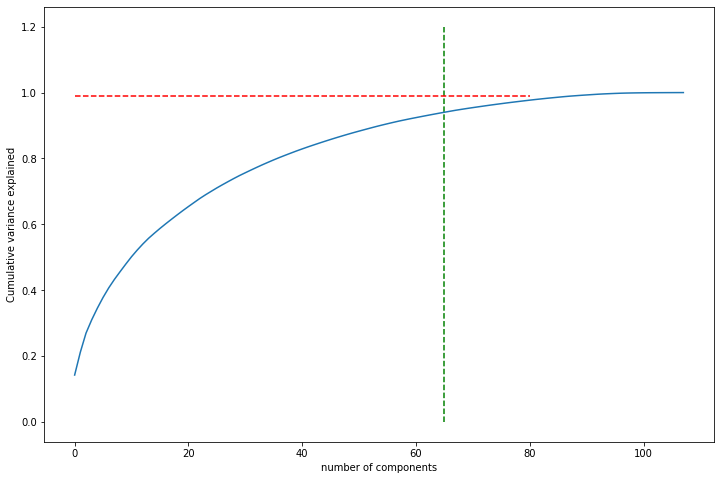

In [68]:
#Screeplot for the PCA components
fig = plt.figure(figsize=[12,8])
plt.vlines(x=65, ymax=1.2, ymin=0, colors="g", linestyles="--")
plt.hlines(y=0.99, xmax=80, xmin=0, colors="r", linestyles="--")
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('Cumulative variance explained')
plt.show()

In [69]:
# Instantiate PCA with 65 components
pca_final = IncrementalPCA(n_components=65)

In [70]:
# Fit and transform the X_train
X_train_pca = pca_final.fit_transform(X_train)

In [71]:
X_train_pca.shape

(94300, 65)

In [72]:
# Transofrm test data wtih pca
X_test_pca = pca_final.transform(X_test)

#####**Logistic regression with PCA**

In [73]:
# Creating KFold object with 10 splits
folds = KFold(n_splits=10, shuffle=True, random_state=4)

# Specify params
params = {"C": [0.01, 0.1, 1, 10, 100, 1000]}

# Specifing score as recall as we are more focused on acheiving the higher sensitivity than the accuracy
model_cv = GridSearchCV(estimator = LogisticRegression(),
                        param_grid = params, 
                        scoring= 'recall', 
                        cv = folds, 
                        verbose = 1,
                        return_train_score=True) 

# Fit the model
model_cv.fit(X_train_pca, y_train)

Fitting 10 folds for each of 6 candidates, totalling 60 fits


GridSearchCV(cv=KFold(n_splits=10, random_state=4, shuffle=True),
             estimator=LogisticRegression(),
             param_grid={'C': [0.01, 0.1, 1, 10, 100, 1000]},
             return_train_score=True, scoring='recall', verbose=1)

In [74]:
# results of grid search CV
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,split5_test_score,split6_test_score,split7_test_score,split8_test_score,split9_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,split5_train_score,split6_train_score,split7_train_score,split8_train_score,split9_train_score,mean_train_score,std_train_score
0,0.834094,0.025197,0.008329,0.000540,0.01,{'C': 0.01},0.863914,0.853782,0.872820,0.854883,0.858005,0.856739,0.865377,0.853853,0.859176,0.864224,0.860277,0.005862,1,0.860199,0.861123,0.859616,0.861091,0.861018,0.861269,0.860010,0.860480,0.860115,0.859836,0.860476,0.000574
1,0.842130,0.036844,0.008117,0.000614,0.1,{'C': 0.1},0.863703,0.853571,0.872607,0.855094,0.858220,0.857174,0.865587,0.853224,0.858539,0.864012,0.860173,0.005867,2,0.860057,0.860816,0.859475,0.860926,0.860947,0.860964,0.859822,0.860433,0.859903,0.859530,0.860287,0.000570
2,0.841067,0.024196,0.008110,0.000587,1,{'C': 1},0.863703,0.853571,0.872607,0.855094,0.858220,0.857174,0.865377,0.853224,0.858539,0.864012,0.860152,0.005848,3,0.860010,0.860793,0.859475,0.860902,0.860947,0.860987,0.859822,0.860410,0.859926,0.859577,0.860285,0.000562
3,0.838854,0.013337,0.007869,0.000113,10,{'C': 10},0.863703,0.853571,0.872607,0.855094,0.858220,0.857174,0.865377,0.853224,0.858326,0.864012,0.860131,0.005855,4,0.859986,0.860793,0.859452,0.860902,0.860924,0.860987,0.859822,0.860410,0.859926,0.859577,0.860278,0.000564
4,0.834922,0.013888,0.008292,0.000992,100,{'C': 100},0.863703,0.853571,0.872607,0.855094,0.858220,0.857174,0.865377,0.853224,0.858326,0.864012,0.860131,0.005855,4,0.859986,0.860793,0.859452,0.860902,0.860924,0.860987,0.859822,0.860410,0.859926,0.859577,0.860278,0.000564
5,0.849073,0.022954,0.008134,0.000366,1000,{'C': 1000},0.863703,0.853571,0.872607,0.855094,0.858220,0.857174,0.865377,0.853224,0.858326,0.864012,0.860131,0.005855,4,0.859986,0.860793,0.859452,0.860902,0.860924,0.860987,0.859822,0.860410,0.859926,0.859577,0.860278,0.000564


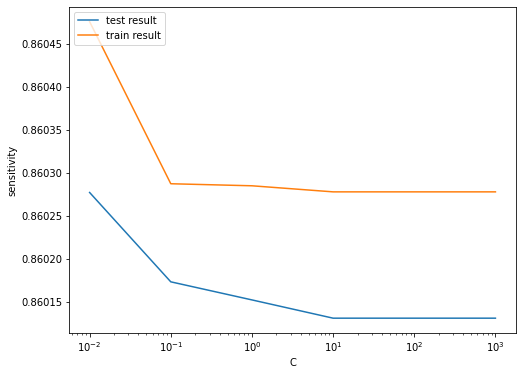

In [75]:
# plot of C versus train and validation scores
plt.figure(figsize=(8, 6))
plt.plot(cv_results['param_C'], cv_results['mean_test_score'])
plt.plot(cv_results['param_C'], cv_results['mean_train_score'])
plt.xlabel('C')
plt.ylabel('sensitivity')
plt.legend(['test result', 'train result'], loc='upper left')
plt.xscale('log')

In [76]:
# Best score with best C
best_score = model_cv.best_score_
best_C = model_cv.best_params_['C']

print(" The highest test sensitivity is {0} at C = {1}".format(best_score, best_C))

 The highest test sensitivity is 0.8602771120657671 at C = 0.01


In [77]:
# Instantiate the model with best C
logistic_pca = LogisticRegression(class_weight='balanced',C=best_C)

# Fit the model on the train set
log_pca_model = logistic_pca.fit(X_train_pca, y_train)

# predict the training data
Y_train_pred = log_pca_model.predict(X_train_pca)
# predict the testing data
Y_test_pred = log_pca_model.predict(X_test_pca)

In [78]:
# Model evaluation
train_eval=pd.DataFrame([evaluate_model(y_train, Y_train_pred)])
test_eval=pd.DataFrame([evaluate_model(y_test, Y_test_pred)])
df_eval=pd.concat([train_eval,test_eval])
df_eval['data']=['train_data','test_data']
df_eval.set_index('data',inplace=True)

In [79]:
df_eval

,TP,TN,FP,FN,Recall,Precision,Specificity,ROC/AUC Score,F1-Score,Accuracy
data,,,,,,,,,,
train_data,40573,36962,10188,6577,86.05,79.93,0.78,86.05,82.88,82.22
test_data,1490,12423,3294,293,83.57,31.15,0.79,83.57,45.38,79.50


In [82]:
!pip install plot-metric

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


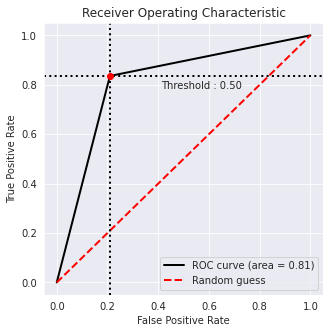

In [83]:
from plot_metric.functions import BinaryClassification
# Visualisation with plot_metric
bc = BinaryClassification(y_test, Y_test_pred, labels=["Class 1", "Class 2"])

# Figures
plt.figure(figsize=(5,5))
bc.plot_roc_curve()
plt.show()

#####**Decision Tree**

In [84]:
# Create the parameter grid 
param_grid = {
    'max_depth': range(10,20,10),
    'min_samples_leaf': range(50, 150, 50),
    'min_samples_split': range(50, 150, 50),
}


# Instantiate the grid search model
dtree = DecisionTreeClassifier(class_weight='balanced',random_state=42)

grid_search = GridSearchCV(estimator = dtree, 
                           param_grid = param_grid, 
                           scoring= 'recall',
                           cv = 5, 
                           verbose = 1)

# Fit the grid search to the data
grid_search.fit(X_train_pca,y_train)

Fitting 5 folds for each of 4 candidates, totalling 20 fits


GridSearchCV(cv=5,
             estimator=DecisionTreeClassifier(class_weight='balanced',
                                              random_state=42),
             param_grid={'max_depth': range(10, 20, 10),
                         'min_samples_leaf': range(50, 150, 50),
                         'min_samples_split': range(50, 150, 50)},
             scoring='recall', verbose=1)

In [85]:
# cv results
cv_results = pd.DataFrame(grid_search.cv_results_)
cv_results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,param_min_samples_leaf,param_min_samples_split,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,11.013299,3.011180,0.016352,0.003003,10,50,50,"{'max_depth': 10, 'min_samples_leaf': 50, 'min...",0.818452,0.835207,0.847508,0.838070,0.830647,0.833977,0.009523,1
1,7.482856,0.258023,0.012746,0.000301,10,50,100,"{'max_depth': 10, 'min_samples_leaf': 50, 'min...",0.818452,0.835207,0.847508,0.838070,0.830647,0.833977,0.009523,1
2,7.198512,0.018455,0.013084,0.000674,10,100,50,"{'max_depth': 10, 'min_samples_leaf': 100, 'mi...",0.806257,0.828208,0.821739,0.817497,0.823118,0.819364,0.007392,3
3,7.285659,0.323022,0.012959,0.000800,10,100,100,"{'max_depth': 10, 'min_samples_leaf': 100, 'mi...",0.806257,0.828208,0.821739,0.817497,0.823118,0.819364,0.007392,3


In [86]:
# Printing the optimal sensitivity score and hyperparameters
print("Best score:-", grid_search.best_score_)
print(grid_search.best_estimator_)

Best score:- 0.8339766702014846
DecisionTreeClassifier(class_weight='balanced', max_depth=10,
                       min_samples_leaf=50, min_samples_split=50,
                       random_state=42)


In [87]:
# Instantiate the model with best hyperparameters
dt_pca = DecisionTreeClassifier(class_weight='balanced', criterion = "gini",max_depth=10,
                       min_samples_leaf=50, min_samples_split=50,
                       random_state=42)

# Fit the model on the train set
dt_pca_model = dt_pca.fit(X_train_pca, y_train)

# predict the training data
Y_train_pred = dt_pca_model.predict(X_train_pca)
# predict the testing data
Y_test_pred = dt_pca_model.predict(X_test_pca)
# Model evaluation
train_eval=pd.DataFrame([evaluate_model(y_train, Y_train_pred)])
test_eval=pd.DataFrame([evaluate_model(y_test, Y_test_pred)])
df_eval=pd.concat([train_eval,test_eval])
df_eval['data']=['train_data','test_data']
df_eval.set_index('data',inplace=True)

In [88]:
df_eval

,TP,TN,FP,FN,Recall,Precision,Specificity,ROC/AUC Score,F1-Score,Accuracy
data,,,,,,,,,,
train_data,40901,39043,8107,6249,86.75,83.46,0.83,86.75,85.07,84.78
test_data,1298,12786,2931,485,72.80,30.69,0.81,72.80,43.18,80.48


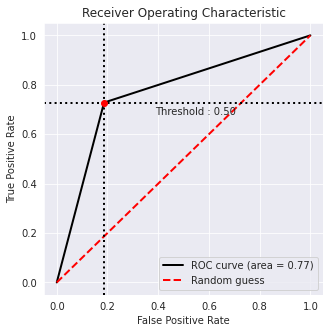

In [89]:
# Visualisation with plot_metric
bc = BinaryClassification(y_test, Y_test_pred, labels=["Class 1", "Class 2"])

# Figures
plt.figure(figsize=(5,5))
bc.plot_roc_curve()
plt.show()

#####**RandomForest Model**

In [90]:
# Create the parameter grid 
param_grid = {
    'max_depth': range(10,20,10),
    'min_samples_leaf': range(50, 150, 50),
    'min_samples_split': range(50, 150, 50),
    'max_features': [20],
    'n_estimators':[300]
}
# Create a based model
rf = RandomForestClassifier(class_weight='balanced')
# Instantiate the grid search model
grid_search = GridSearchCV(estimator = rf, 
                           param_grid = param_grid, 
                           cv = 3,
                           verbose = 1, 
                           scoring='recall',
                           return_train_score=True)

# Fit the model
grid_search.fit(X_train_pca, y_train)

Fitting 3 folds for each of 4 candidates, totalling 12 fits


GridSearchCV(cv=3, estimator=RandomForestClassifier(class_weight='balanced'),
             param_grid={'max_depth': range(10, 20, 10), 'max_features': [20],
                         'min_samples_leaf': range(50, 150, 50),
                         'min_samples_split': range(50, 150, 50),
                         'n_estimators': [300]},
             return_train_score=True, scoring='recall', verbose=1)

In [91]:
print("Best Score",grid_search.best_score_)
print("Best Params",grid_search.best_params_)

Best Score 0.8537859221494997
Best Params {'max_depth': 10, 'max_features': 20, 'min_samples_leaf': 50, 'min_samples_split': 100, 'n_estimators': 300}


In [92]:
# Instantiate the model with best hyperparameters
rfc_pca = RandomForestClassifier(class_weight='balanced',
                             max_depth=10,
                             min_samples_leaf=50, 
                             min_samples_split=100,
                             max_features=20,
                             n_estimators=300,
                       random_state=42)

# Fit the model on the train set
rfc_pca_model = rfc_pca.fit(X_train_pca, y_train)

# predict the training data
Y_train_pred = rfc_pca_model.predict(X_train_pca)
# predict the testing data
Y_test_pred = rfc_pca_model.predict(X_test_pca)
# Model evaluation
train_eval=pd.DataFrame([evaluate_model(y_train, Y_train_pred)])
test_eval=pd.DataFrame([evaluate_model(y_test, Y_test_pred)])
df_eval=pd.concat([train_eval,test_eval])
df_eval['data']=['train_data','test_data']
df_eval.set_index('data',inplace=True)

In [93]:
df_eval

,TP,TN,FP,FN,Recall,Precision,Specificity,ROC/AUC Score,F1-Score,Accuracy
data,,,,,,,,,,
train_data,41137,41017,6133,6013,87.25,87.03,0.87,87.25,87.14,87.12
test_data,1341,13584,2133,442,75.21,38.60,0.86,75.21,51.02,85.29


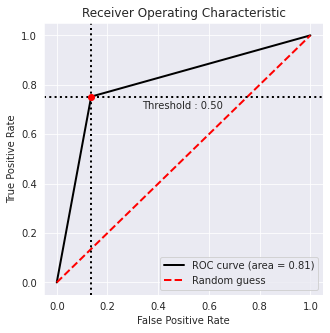

In [94]:
# Visualisation with plot_metric
bc = BinaryClassification(y_test, Y_test_pred, labels=["Class 1", "Class 2"])

# Figures
plt.figure(figsize=(5,5))
bc.plot_roc_curve()
plt.show()

#####**XGBOOST Model**

In [95]:
from hyperopt import STATUS_OK, Trials, fmin, hp, tpe
import xgboost as xgb
from xgboost.sklearn import XGBClassifier

In [96]:
space={'max_depth': hp.quniform("max_depth", 3, 20, 1),
        'gamma': hp.uniform ('gamma', 1,9),
        'reg_alpha' : hp.quniform('reg_alpha', 40,180,1),
        'reg_lambda' : hp.uniform('reg_lambda', 0,1),
        'colsample_bytree' : hp.uniform('colsample_bytree', 0.5,1),
        'min_child_weight' : hp.quniform('min_child_weight', 0, 10, 1),
        'n_estimators': 500,
        'seed': 42,

    }

In [97]:
def objective(space):
    clf=xgb.XGBClassifier(
                    n_estimators =space['n_estimators'], max_depth = int(space['max_depth']), gamma = space['gamma'],
                    reg_alpha = int(space['reg_alpha']),min_child_weight=int(space['min_child_weight']),
                    colsample_bytree=int(space['colsample_bytree']))
    
    evaluation = [( X_train_pca, y_train), ( X_test_pca, y_test)]
    
    clf.fit(X_train_pca, y_train,
            eval_set=evaluation, eval_metric="auc",
            early_stopping_rounds=10,verbose=False)
    

    pred = clf.predict(X_test_pca)
    accuracy = accuracy_score(y_test, pred>0.5)
    print ("SCORE:", accuracy)
    return {'loss': -accuracy, 'status': STATUS_OK }

In [ ]:
trials = Trials()

best_hyperparams = fmin(fn = objective,
                        space = space,
                        algo = tpe.suggest,
                        max_evals = 100,
                        trials = trials)

SCORE:
0.6806285714285715
SCORE:
0.6798857142857143
SCORE:
0.6809714285714286
SCORE:
0.6797142857142857
SCORE:
0.68
SCORE:
0.6807428571428571
SCORE:
0.6775428571428571
SCORE:
0.6794285714285714
SCORE:
0.6802285714285714
SCORE:
0.6800571428571428
SCORE:
0.6808
SCORE:
0.6807428571428571
SCORE:
0.6678285714285714
SCORE:
0.6798285714285714
SCORE:
0.6804571428571429
SCORE:
0.68
SCORE:
0.6796
SCORE:
0.6818285714285715
SCORE:
0.682
SCORE:
0.6800571428571428
SCORE:
0.6817142857142857
SCORE:
0.6810857142857143
SCORE:
0.6802857142857143
SCORE:
0.6828
SCORE:
0.6799428571428572
SCORE:
0.6794285714285714
SCORE:
0.6816
SCORE:
0.6805714285714286
SCORE:
0.68
SCORE:
0.6805142857142857
SCORE:
0.6819428571428572
SCORE:
0.6808
SCORE:
0.6812
SCORE:
0.6790857142857143
SCORE:
0.6799428571428572
SCORE:
0.6797142857142857
SCORE:
0.6806857142857143
SCORE:
0.6809142857142857
SCORE:
0.6808571428571428
SCORE:
0.6821714285714285
SCORE:
0.682
SCORE:
0.6806285714285715
SCORE:
0.6692
SCORE:
0.6809142857142857
SCORE:
0

In [ ]:
print("The best hyperparameters are : ","\n")
print(best_hyperparams)

In [100]:
# Instantiate the model with best hyperparameters
xgb_pca = XGBClassifier(objective = 'binary:logistic',
                         colsample_bytree=0.6299799870755995,
                            max_depth= 6,
                            min_child_weight= 8.0,
                            reg_alpha=147.0,
                            seed= 42,
                            gamma=6.4481004476830694,
                            reg_lambda=0.07371162154132266,
                           
                        )

# Fit the model on the train set
xgb_pca_model = xgb_pca.fit(X_train_pca, y_train)

# predict the training data
Y_train_pred = xgb_pca_model.predict(X_train_pca)
# predict the testing data
Y_test_pred = xgb_pca_model.predict(X_test_pca)
# Model evaluation
train_eval=pd.DataFrame([evaluate_model(y_train, Y_train_pred)])
test_eval=pd.DataFrame([evaluate_model(y_test, Y_test_pred)])
df_eval=pd.concat([train_eval,test_eval])
df_eval['data']=['train_data','test_data']
df_eval.set_index('data',inplace=True)

In [101]:
df_eval

,TP,TN,FP,FN,Recall,Precision,Specificity,ROC/AUC Score,F1-Score,Accuracy
data,,,,,,,,,,
train_data,40881,40527,6623,6269,86.70,86.06,0.86,86.70,86.38,86.33
test_data,1394,13507,2210,389,78.18,38.68,0.86,78.18,51.75,85.15


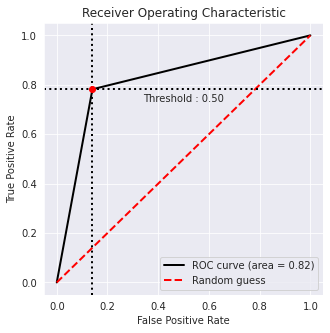

In [143]:
# Visualisation with plot_metric
bc = BinaryClassification(y_test, Y_test_pred, labels=["Class 1", "Class 2"])

# Figures
plt.figure(figsize=(5,5))
bc.plot_roc_curve()
plt.show()

####**Model prediction on Unseen Data**

In [214]:
#test = pd.read_csv('test.csv')

In [215]:
#Check the test dataset
test.head()

,id,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,date_of_last_rech_6,date_of_last_rech_7,date_of_last_rech_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,date_of_last_rech_data_6,date_of_last_rech_data_7,date_of_last_rech_data_8,total_rech_data_6,total_rech_data_7,total_rech_data_8,max_rech_data_6,max_rech_data_7,max_rech_data_8,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_2g_6,arpu_2g_7,arpu_2g_8,night_pck_user_6,night_pck_user_7,night_pck_user_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,fb_user_6,fb_user_7,fb_user_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g
0,69999,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,91.882,65.330,64.445,31.78,20.23,23.11,60.16,32.16,34.83,0.00,0.00,0.00,0.00,0.00,0.00,24.88,20.23,21.06,18.13,10.89,8.36,0.00,13.58,0.00,0.0,0.00,0.03,43.01,44.71,29.43,6.90,0.00,2.05,42.03,7.68,26.43,0.0,0.0,0.0,0.0,0.0,0.0,48.93,7.68,28.48,0.0,0.0,0.0,0.00,0.00,0.03,0.0,0.0,0.0,91.94,52.39,57.94,30.33,37.56,21.98,10.21,4.59,9.53,0.26,0.00,0.00,40.81,42.16,31.51,0.00,0.00,0.00,0.36,1.04,4.34,0.0,0.0,0.00,0.0,0.0,0.0,0.36,1.04,4.34,41.73,43.56,36.26,0.54,0.34,0.39,0.00,0.00,0.00,0.0,0.0,0.00,5,5,4,103,90,60,50,30,30,6/21/2014,7/26/2014,8/24/2014,30,30,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN,1692,0.00,0.00,0.00
1,70000,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,414.168,515.568,360.868,75.51,41.21,19.84,474.34,621.84,394.94,0.00,0.00,0.00,0.00,0.00,0.00,75.51,41.21,19.84,473.61,598.08,377.26,0.73,0.00,0.00,0.0,0.00,0.00,549.86,639.29,397.11,0.00,0.00,0.00,0.00,23.76,17.68,0.0,0.0,0.0,0.0,0.0,0.0,0.00,23.76,17.68,0.0,0.0,0.8,0.00,0.00,0.00,0.0,0.0,0.0,549.86,663.06,415.59,19.99,26.95,2.61,160.19,122.29,184.81,1.49,0.00,0.00,181.69,149.24,187.43,0.00,0.00,0.00,0.00,12.51,0.00,0.0,0.0,0.00,0.0,0.0,0.0,0.00,12.51,0.00,296.33,339.64,281.66,0.00,0.00,0.00,114.63,177.88,94.23,0.0,0.0,0.00,5,4,5,500,500,500,250,250,250,6/19/2014,7/16/2014,8/24/2014,250,0,0,NaN,NaN,Na

In [ ]:
test_id = test.id

In [216]:
#Check the shape of test dataset
test.shape

(30000, 171)

In [217]:
#Convert the date columns to datetime datatype
test["date_of_last_rech_8"] = pd.to_datetime(test['date_of_last_rech_8'])
test["date_of_last_rech_7"] = pd.to_datetime(test['date_of_last_rech_7'])
test["date_of_last_rech_6"] = pd.to_datetime(test['date_of_last_rech_6'])

In [218]:
#Create new features
test['recharge2_days']=(test['date_of_last_rech_8'] - test['date_of_last_rech_7']).dt.days
test['recharge1_days']=(test['date_of_last_rech_7'] - test['date_of_last_rech_6']).dt.days

In [219]:
#Drop the columns which are not required
test.drop(['date_of_last_rech_8','date_of_last_rech_7', 'date_of_last_rech_6'], axis = 1, inplace=True)

In [220]:
#Fill missing values
test = fill_Missing_Values(test)

In [221]:
#Get the columns which are used for training the model
tr_cols = train.columns.to_list()
tr_cols.remove('churn_probability')
len(tr_cols)

In [224]:
#Reshape the test data according to the train data
test = test[tr_cols]

In [225]:
#Transform the features
test[tr_cols] = scaler.transform(test[tr_cols])

**Apply predicition test data using highly performed model**

In [227]:
test_rfeat = test[selected_feat]

In [228]:
preds=randfor.predict(test_rfeat)

In [ ]:
sample_df = pd.read_csv('solution.csv)
sample_df['churn_probability'] = preds
sample_df.to_csv('Submission_final.csv',index=False)

**END**

In [ ]:
sample_df = pd.read_csv('solution.csv)

In [229]:
accuracy_score(sample_df.churn_probability, preds)

0.9241

In [230]:
sample_df['churn_probability']=preds

In [232]:
sample_df.to_csv('Submission_final.csv',index=False)

In [209]:
test = pca_final.transform(test)

In [210]:
preds1=rfc_pca_model.predict(test)

In [211]:
accuracy_score(sample_df.churn_probability, preds1)

0.8498333333333333

In [212]:
preds2=xgb_pca_model.predict(test)

In [213]:
accuracy_score(sample_df.churn_probability, preds2)

0.845